In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [2]:
xr.open_dataset('/global/scratch/users/jennaisrael/time_varying_data/tide_gauge_data/elev2D.eventremove.th.nc')

<xarray.Dataset> Size: 7MB
Dimensions:      (one: 1, time: 19681, nOpenBndNodes: 83, nLevels: 1,
                  nComponents: 1)
Coordinates:
  * time         (time) datetime64[ns] 157kB 2020-09-10 ... 2020-12-01
Dimensions without coordinates: one, nOpenBndNodes, nLevels, nComponents
Data variables:
    time_step    (one) float32 4B ...
    time_series  (time, nOpenBndNodes, nLevels, nComponents) float32 7MB ...
Attributes:
    description:  Water Surface Elevation Boundary Conditions at Ocean Boundary 
    history:      Created 2025-09-25 20:54:57.834111
    source:       gen_ elev2D.py

In [11]:
elev=xr.open_dataset('/global/scratch/users/jennaisrael/time_varying_data/tide_gauge_data/elev2D.eventremove.th.nc')

In [4]:
elevh=xr.open_dataset('/global/scratch/users/jennaisrael/time_varying_data/tide_gauge_data/elev2D.hist.th.nc')

In [5]:
elev.time

<xarray.DataArray 'time' (time: 19681)> Size: 157kB
array(['2020-09-10T00:00:00.000000000', '2020-09-10T00:06:00.000000000',
       '2020-09-10T00:12:00.000000000', ..., '2020-11-30T23:48:00.000000000',
       '2020-11-30T23:54:00.000000000', '2020-12-01T00:00:00.000000000'],
      shape=(19681,), dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 157kB 2020-09-10 ... 2020-12-01
Attributes:
    long_name:  simulation time in seconds

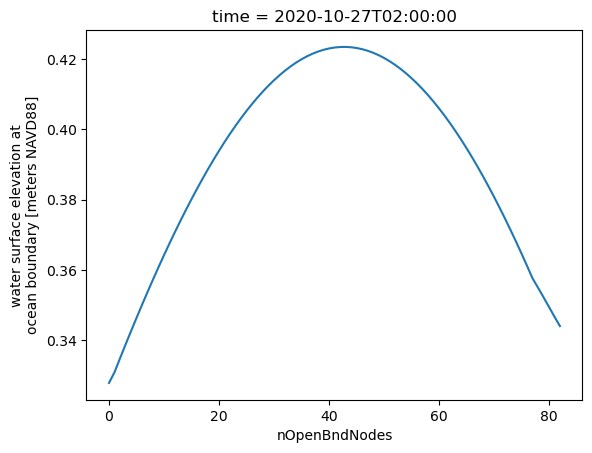

In [6]:
elev.sel(time='2020-10-27T02:00:00.000000000').time_series.plot()

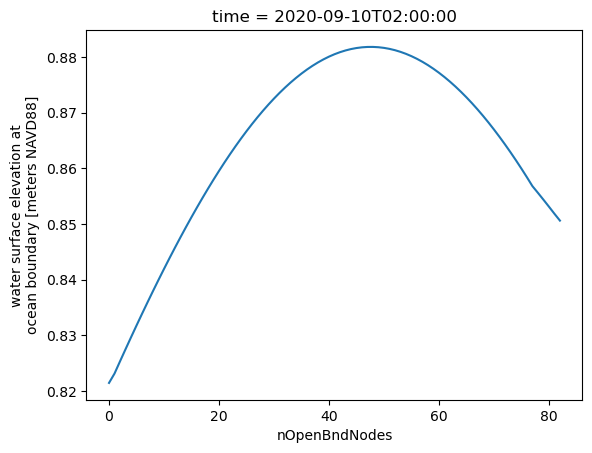

In [7]:
elev.sel(time='2020-09-10T02:00:00.000000000').time_series.plot()

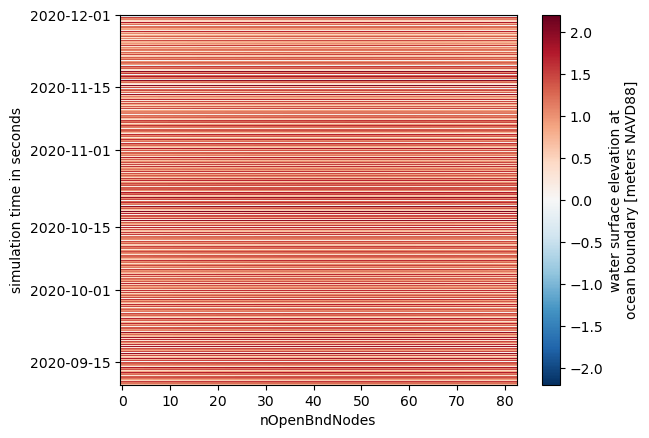

In [8]:
elev.time_series.plot()

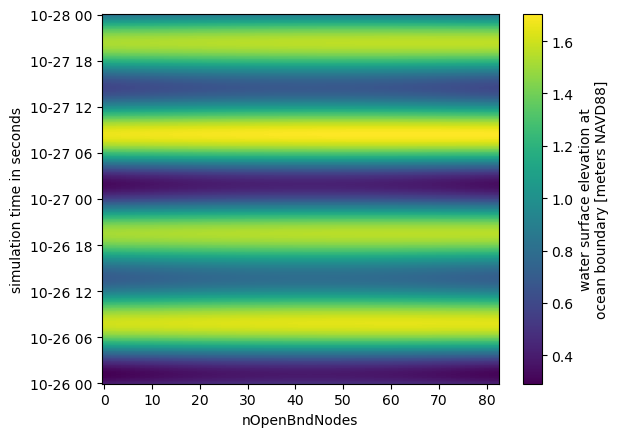

In [9]:
elev.loc[dict(time=slice('2020-10-26T00:00:00.000000000','2020-10-28T00:00:00.000000000'))].time_series.plot()

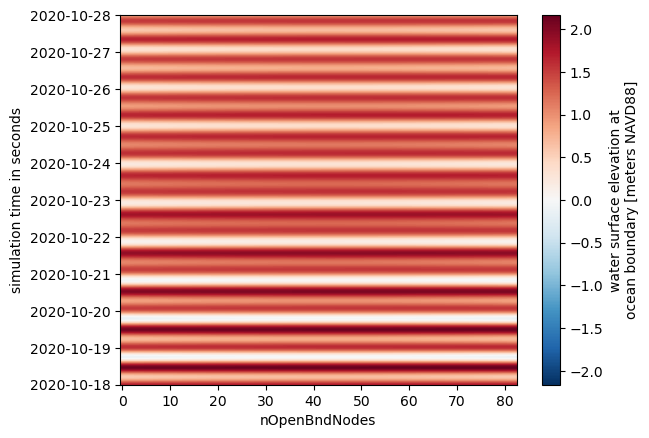

In [10]:
elev.loc[dict(time=slice('2020-10-18T00:00:00.000000000','2020-10-28T00:00:00.000000000'))].time_series.plot()

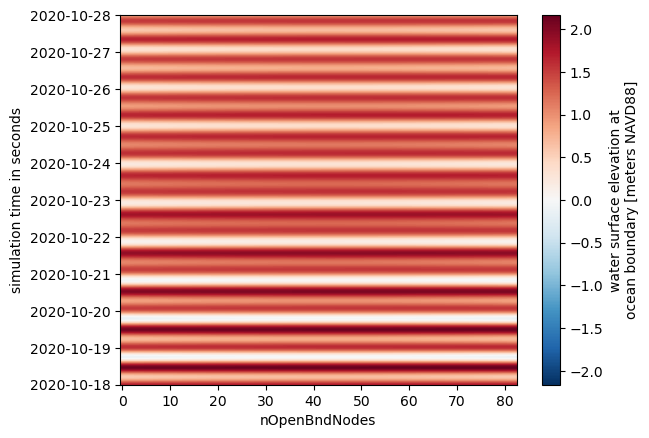

In [11]:
elevh.loc[dict(time=slice('2020-10-18T00:00:00.000000000','2020-10-28T00:00:00.000000000'))].time_series.plot()

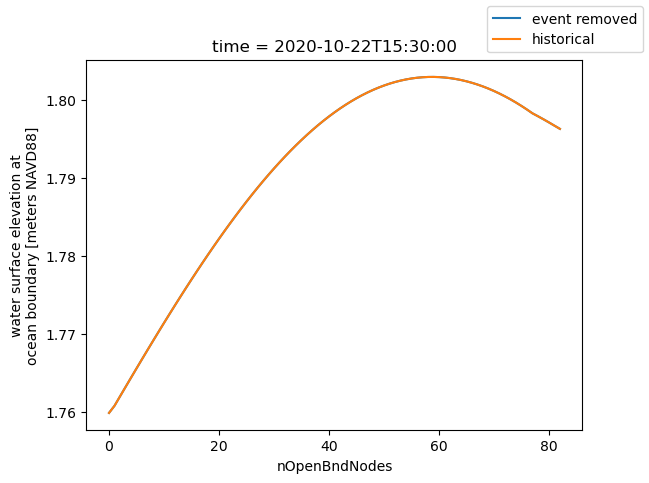

In [12]:
fig, ax =plt.subplots()
elev.sel(time='2020-10-22T15:30:00.000000000').time_series.plot(label='event removed')
elevh.sel(time='2020-10-22T15:30:00.000000000').time_series.plot(label='historical')
fig.legend()

In [13]:
# elev.loc['2020-10-27T02:00:00.000000000']

In [14]:
elev.loc[dict(time=slice('2020-10-26T00:00:00.000000000','2020-10-28T00:00:00.000000000'))]

<xarray.Dataset> Size: 164kB
Dimensions:      (one: 1, time: 481, nOpenBndNodes: 83, nLevels: 1,
                  nComponents: 1)
Coordinates:
  * time         (time) datetime64[ns] 4kB 2020-10-26 ... 2020-10-28
Dimensions without coordinates: one, nOpenBndNodes, nLevels, nComponents
Data variables:
    time_step    (one) float32 4B ...
    time_series  (time, nOpenBndNodes, nLevels, nComponents) float32 160kB ...
Attributes:
    description:  Water Surface Elevation Boundary Conditions at Ocean Boundary 
    history:      Created 2025-09-25 20:54:57.834111
    source:       gen_ elev2D.py

In [16]:
monterey=pd.read_csv('/global/scratch/users/jennaisrael/time_varying_data/tide_gauge_data/noaa_monterey_event_removed_2020.csv')
dtformat = '%Y-%m-%d %H:%M:%S'
monterey['datetime'] = pd.to_datetime(monterey['datetime'],format=dtformat)
#m_raw=pd.read_csv('/global/scratch/users/jennaisrael/time_varying_data/tide_gauge_data/noaa_monterey_raw_2020_reformatted.csv')
monterey

,datetime,elev[m],sigma,verified,F,R,L,quality,hifi_removed
0,2020-08-01 00:00:00,0.696,0.032,0.0,0.0,0.0,0.0,v,0.696
1,2020-08-01 00:06:00,0.643,0.022,0.0,0.0,0.0,0.0,v,0.643
2,2020-08-01 00:12:00,0.612,0.020,0.0,0.0,0.0,0.0,v,0.612
3,2020-08-01 00:18:00,0.583,0.021,0.0,0.0,0.0,0.0,v,0.583
4,2020-08-01 00:24:00,0.528,0.017,0.0,0.0,0.0,0.0,v,0.528
...,...,...,...,...,...,...,...,...,...
36476,2020-12-30 23:36:00,1.320,0.083,0.0,0.0,0.0,0.0,v,1.320
36477,2020-12-30 23:42:00,1.306,0.088,0.0,0.0,0.0,0.0,v,1.306
36478,2020-12-30 23:48:00,1.300,0.093,0.0,0.0,0.0,0.0,v,1.300
36479,2020-12-30 23:54:00,1.317,0.127,0.0,0.0,0.0,0.0,v,1.317


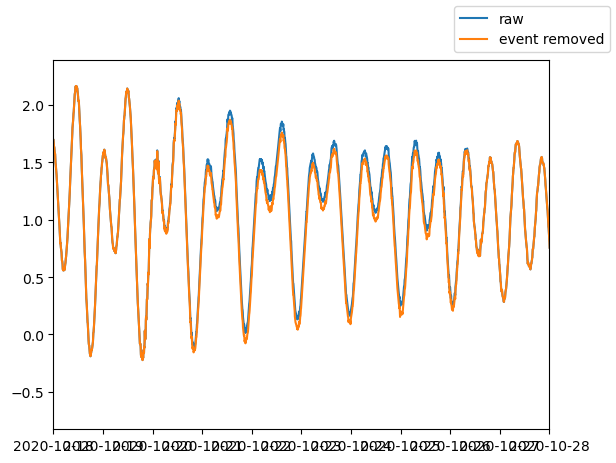

In [17]:
fig, ax = plt.subplots()

ax.plot(monterey.datetime, monterey['elev[m]'],label='raw')
ax.plot(monterey.datetime, monterey['hifi_removed'], label='event removed')
fig.legend()
ax.set_xlim(datetime(2020,10,18),datetime(2020,10,28))
plt.show()

In [24]:
monterey_f=pd.read_csv('/global/scratch/users/jennaisrael/time_varying_data/tide_gauge_data/noaa_monterey_event_removed_2020_reformatted.csv',skiprows=8)
dtformat = '%m/%d/%Y %H:%M'
monterey_f['datetime'] = pd.to_datetime(monterey_f['Date Time'],format=dtformat)
monterey_f

,Date Time,Water Level,Sigma,O or I (for verified),F,R,L,Quality,datetime
0,8/1/2020 0:00,0.696,0.032,0,0,0,0,v,2020-08-01 00:00:00
1,8/1/2020 0:06,0.643,0.022,0,0,0,0,v,2020-08-01 00:06:00
2,8/1/2020 0:12,0.612,0.020,0,0,0,0,v,2020-08-01 00:12:00
3,8/1/2020 0:18,0.583,0.021,0,0,0,0,v,2020-08-01 00:18:00
4,8/1/2020 0:24,0.528,0.017,0,0,0,0,v,2020-08-01 00:24:00
...,...,...,...,...,...,...,...,...,...
36476,12/30/2020 23:36,1.320,0.083,0,0,0,0,v,2020-12-30 23:36:00
36477,12/30/2020 23:42,1.306,0.088,0,0,0,0,v,2020-12-30 23:42:00
36478,12/30/2020 23:48,1.300,0.093,0,0,0,0,v,2020-12-30 23:48:00
36479,12/30/2020 23:54,1.317,0.127,0,0,0,0,v,2020-12-30 23:54:00


In [25]:
monterey_h=pd.read_csv('/global/scratch/users/jennaisrael/time_varying_data/tide_gauge_data/noaa_monterey_raw_2020_reformatted.csv',skiprows=8)
dtformat = '%m/%d/%Y %H:%M'
monterey_h['datetime'] = pd.to_datetime(monterey_h['Date Time'],format=dtformat)
monterey_h

,Date Time,Water Level,Sigma,O or I (for verified),F,R,L,Quality,datetime
0,8/1/2020 0:00,0.696,0.032,0,0,0,0,v,2020-08-01 00:00:00
1,8/1/2020 0:06,0.643,0.022,0,0,0,0,v,2020-08-01 00:06:00
2,8/1/2020 0:12,0.612,0.020,0,0,0,0,v,2020-08-01 00:12:00
3,8/1/2020 0:18,0.583,0.021,0,0,0,0,v,2020-08-01 00:18:00
4,8/1/2020 0:24,0.528,0.017,0,0,0,0,v,2020-08-01 00:24:00
...,...,...,...,...,...,...,...,...,...
36476,12/30/2020 23:36,1.320,0.083,0,0,0,0,v,2020-12-30 23:36:00
36477,12/30/2020 23:42,1.306,0.088,0,0,0,0,v,2020-12-30 23:42:00
36478,12/30/2020 23:48,1.300,0.093,0,0,0,0,v,2020-12-30 23:48:00
36479,12/30/2020 23:54,1.317,0.127,0,0,0,0,v,2020-12-30 23:54:00


In [27]:
monterey_h.keys()

Index(['Date Time', ' Water Level', ' Sigma', ' O or I (for verified)', ' F',
       ' R', ' L', ' Quality ', 'datetime'],
      dtype='object')

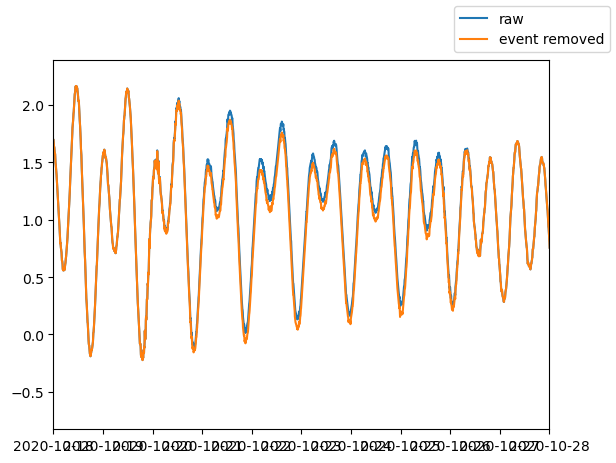

In [28]:
fig, ax = plt.subplots()

ax.plot(monterey_h.datetime, monterey_h[' Water Level'],label='raw')
ax.plot(monterey_f.datetime, monterey_f[' Water Level'], label='event removed')
fig.legend()
ax.set_xlim(datetime(2020,10,18),datetime(2020,10,28))
plt.show()

In [29]:
#what about the files I sent Eli?

monterey_2=pd.read_csv('/global/scratch/users/jennaisrael/run_schism/data_out/noaa_9413450_9413450_water_level_2020_2020.csv',skiprows=8)
dtformat = '%m/%d/%Y %H:%M'
monterey_2['datetime'] = pd.to_datetime(monterey_2['Date Time'],format=dtformat)
monterey_2

,Date Time,Water Level,Sigma,O or I (for verified),F,R,L,Quality,datetime
0,8/1/2020 0:00,0.696,0.032,0,0,0,0,v,2020-08-01 00:00:00
1,8/1/2020 0:06,0.643,0.022,0,0,0,0,v,2020-08-01 00:06:00
2,8/1/2020 0:12,0.612,0.020,0,0,0,0,v,2020-08-01 00:12:00
3,8/1/2020 0:18,0.583,0.021,0,0,0,0,v,2020-08-01 00:18:00
4,8/1/2020 0:24,0.528,0.017,0,0,0,0,v,2020-08-01 00:24:00
...,...,...,...,...,...,...,...,...,...
36476,12/30/2020 23:36,1.320,0.083,0,0,0,0,v,2020-12-30 23:36:00
36477,12/30/2020 23:42,1.306,0.088,0,0,0,0,v,2020-12-30 23:42:00
36478,12/30/2020 23:48,1.300,0.093,0,0,0,0,v,2020-12-30 23:48:00
36479,12/30/2020 23:54,1.317,0.127,0,0,0,0,v,2020-12-30 23:54:00


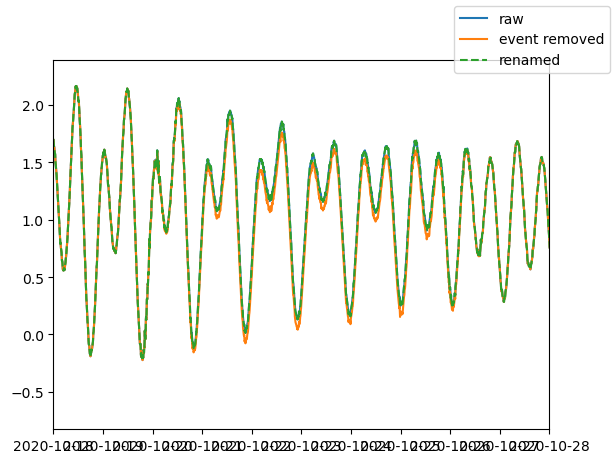

In [30]:
fig, ax = plt.subplots()

ax.plot(monterey_h.datetime, monterey_h[' Water Level'],label='raw')
ax.plot(monterey_f.datetime, monterey_f[' Water Level'], label='event removed')
ax.plot(monterey_2.datetime, monterey_2[' Water Level'], label='renamed',linestyle='--')
fig.legend()
ax.set_xlim(datetime(2020,10,18),datetime(2020,10,28))
plt.show()

In [ ]:
#this means I likely sent Eli 2 of the same files which is why the elev2D files look the same
#but why are they going crazy on October 27?

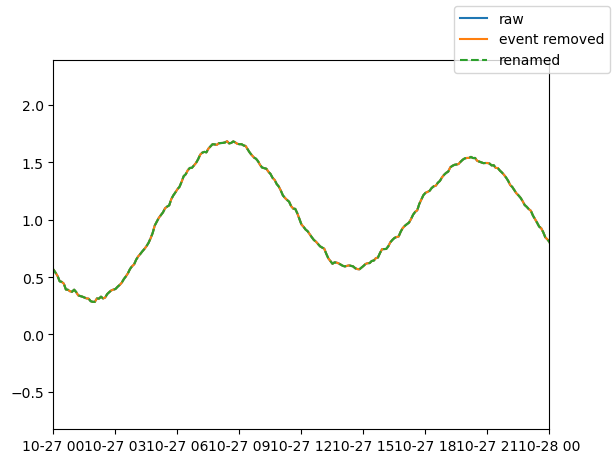

In [32]:
fig, ax = plt.subplots()

ax.plot(monterey_h.datetime, monterey_h[' Water Level'],label='raw')
ax.plot(monterey_f.datetime, monterey_f[' Water Level'], label='event removed')
ax.plot(monterey_2.datetime, monterey_2[' Water Level'], label='renamed',linestyle='--')
fig.legend()
ax.set_xlim(datetime(2020,10,27),datetime(2020,10,28))
plt.show()

In [35]:
#Did something get messed up from the original data?
noaa=pd.read_csv('/global/scratch/users/jennaisrael/time_varying_data/tide_gauge_data/noaa_9413450_9413450_water_level_1950_2021.csv',skiprows=8)
dtformat = '%Y-%m-%d %H:%M'
noaa['datetime'] = pd.to_datetime(noaa['Date Time'],format=dtformat)
noaa

,Date Time,Water Level,Sigma,O or I (for verified),F,R,L,Quality,datetime
0,1995-12-01 00:00,NaN,NaN,1,1,1,1,p,1995-12-01 00:00:00
1,1995-12-01 00:06,NaN,NaN,1,1,1,1,p,1995-12-01 00:06:00
2,1995-12-01 00:12,NaN,NaN,1,1,1,1,p,1995-12-01 00:12:00
3,1995-12-01 00:18,NaN,NaN,1,1,1,1,p,1995-12-01 00:18:00
4,1995-12-01 00:24,NaN,NaN,1,1,1,1,p,1995-12-01 00:24:00
...,...,...,...,...,...,...,...,...,...
2264875,2021-10-01 23:30,0.423,0.076,0,0,0,0,v,2021-10-01 23:30:00
2264876,2021-10-01 23:36,0.378,0.122,0,0,0,0,v,2021-10-01 23:36:00
2264877,2021-10-01 23:42,0.375,0.083,0,0,0,0,v,2021-10-01 23:42:00
2264878,2021-10-01 23:48,0.333,0.084,0,0,0,0,v,2021-10-01 23:48:00


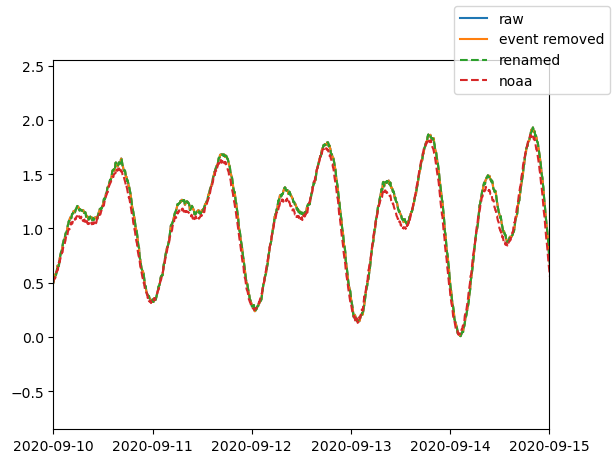

In [39]:
fig, ax = plt.subplots()

ax.plot(monterey_h.datetime, monterey_h[' Water Level'],label='raw')
ax.plot(monterey_f.datetime, monterey_f[' Water Level'], label='event removed')
ax.plot(monterey_2.datetime, monterey_2[' Water Level'], label='renamed',linestyle='--')
ax.plot(noaa.datetime, noaa[' Water Level'], label='noaa',linestyle='--')
fig.legend()
ax.set_xlim(datetime(2020,9,10),datetime(2020,9,15))
plt.show()

# Try new files made on Expanse with reformatted tide gauge files

In [3]:
er1=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/tide_gauge_data/2025_sept_elev_files/elev2D.event_removed.th.nc")
er2=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/tide_gauge_data/2025_sept_elev_files/elev2D.event_removed_date_formatted_2.th.nc")
er2

<xarray.Dataset> Size: 7MB
Dimensions:      (one: 1, time: 19441, nOpenBndNodes: 83, nLevels: 1,
                  nComponents: 1)
Coordinates:
  * time         (time) datetime64[ns] 156kB 2020-09-10 ... 2020-11-30
Dimensions without coordinates: one, nOpenBndNodes, nLevels, nComponents
Data variables:
    time_step    (one) float32 4B ...
    time_series  (time, nOpenBndNodes, nLevels, nComponents) float32 6MB ...
Attributes:
    description:  Water Surface Elevation Boundary Conditions at Ocean Boundary 
    history:      Created 2025-09-28 14:46:33.574454
    source:       gen_ elev2D.py

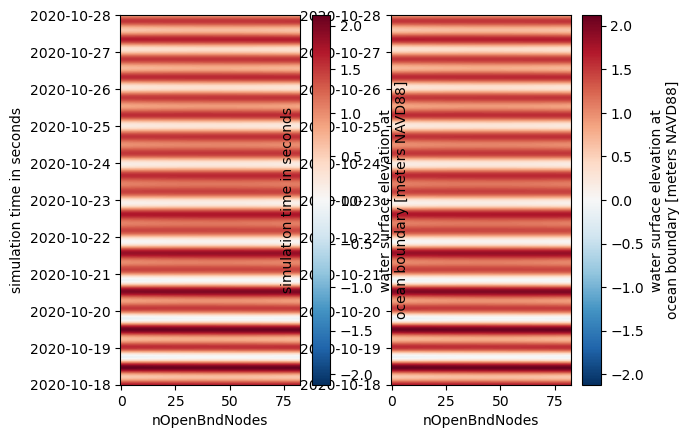

In [7]:
#are these files the same?
fig, ax =plt.subplots(1,2)
er1.loc[dict(time=slice('2020-10-18T00:00:00.000000000','2020-10-28T00:00:00.000000000'))].time_series.plot(ax=ax[0])
er2.loc[dict(time=slice('2020-10-18T00:00:00.000000000','2020-10-28T00:00:00.000000000'))].time_series.plot(ax=ax[1])

In [8]:
hist1=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/tide_gauge_data/2025_sept_elev_files/elev2D.hist.th.nc")
hist2=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/tide_gauge_data/2025_sept_elev_files/elev2D.hist_date_formatted.th.nc")
hist2

<xarray.Dataset> Size: 7MB
Dimensions:      (one: 1, time: 19441, nOpenBndNodes: 83, nLevels: 1,
                  nComponents: 1)
Coordinates:
  * time         (time) datetime64[ns] 156kB 2020-09-10 ... 2020-11-30
Dimensions without coordinates: one, nOpenBndNodes, nLevels, nComponents
Data variables:
    time_step    (one) float32 4B ...
    time_series  (time, nOpenBndNodes, nLevels, nComponents) float32 6MB ...
Attributes:
    description:  Water Surface Elevation Boundary Conditions at Ocean Boundary 
    history:      Created 2025-09-28 14:39:22.292967
    source:       gen_ elev2D.py

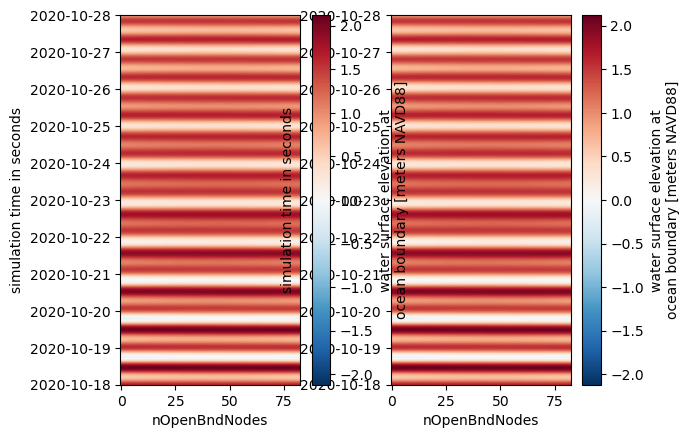

In [9]:
#are these files the same?
fig, ax =plt.subplots(1,2)
hist1.loc[dict(time=slice('2020-10-18T00:00:00.000000000','2020-10-28T00:00:00.000000000'))].time_series.plot(ax=ax[0])
hist2.loc[dict(time=slice('2020-10-18T00:00:00.000000000','2020-10-28T00:00:00.000000000'))].time_series.plot(ax=ax[1])

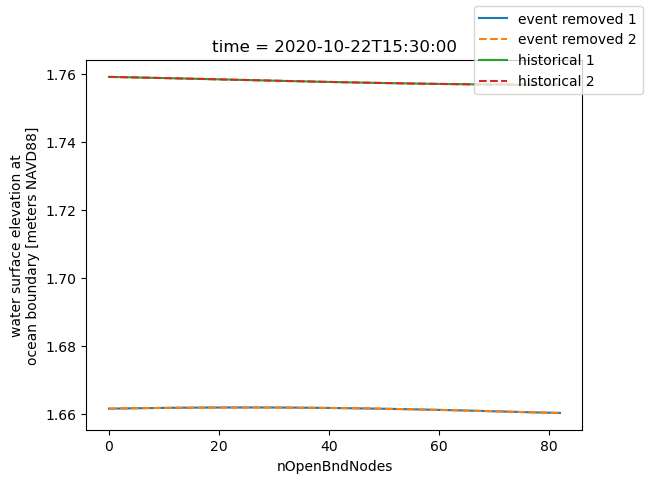

In [10]:
fig, ax =plt.subplots()
er1.sel(time='2020-10-22T15:30:00.000000000').time_series.plot(label='event removed 1')
er2.sel(time='2020-10-22T15:30:00.000000000').time_series.plot(label='event removed 2',linestyle='--')
hist1.sel(time='2020-10-22T15:30:00.000000000').time_series.plot(label='historical 1')
hist2.sel(time='2020-10-22T15:30:00.000000000').time_series.plot(label='historical 2',linestyle='--')
fig.legend()

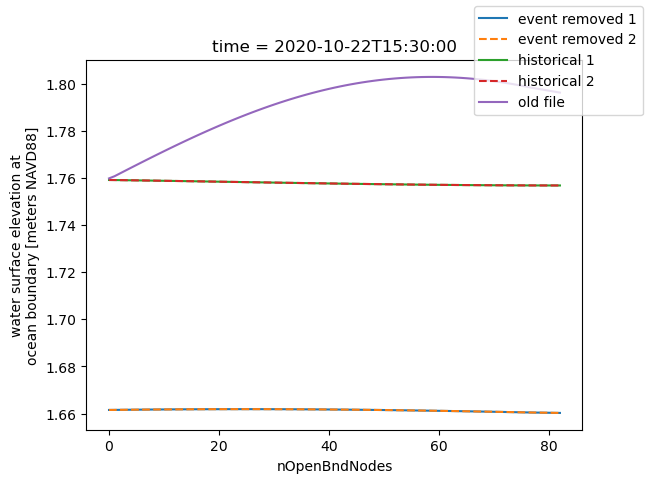

In [12]:
fig, ax =plt.subplots()
er1.sel(time='2020-10-22T15:30:00.000000000').time_series.plot(label='event removed 1')
er2.sel(time='2020-10-22T15:30:00.000000000').time_series.plot(label='event removed 2',linestyle='--')
hist1.sel(time='2020-10-22T15:30:00.000000000').time_series.plot(label='historical 1')
hist2.sel(time='2020-10-22T15:30:00.000000000').time_series.plot(label='historical 2',linestyle='--')
elev.sel(time='2020-10-22T15:30:00.000000000').time_series.plot(label='old file')
fig.legend()

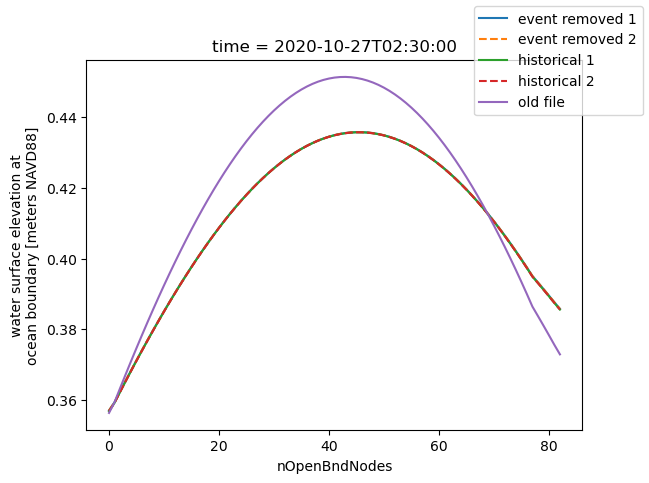

In [13]:
fig, ax =plt.subplots()
er1.sel(time='2020-10-27T02:30:00.000000000').time_series.plot(label='event removed 1')
er2.sel(time='2020-10-27T02:30:00.000000000').time_series.plot(label='event removed 2',linestyle='--')
hist1.sel(time='2020-10-27T02:30:00.000000000').time_series.plot(label='historical 1')
hist2.sel(time='2020-10-27T02:30:00.000000000').time_series.plot(label='historical 2',linestyle='--')
elev.sel(time='2020-10-27T02:30:00.000000000').time_series.plot(label='old file')
fig.legend()

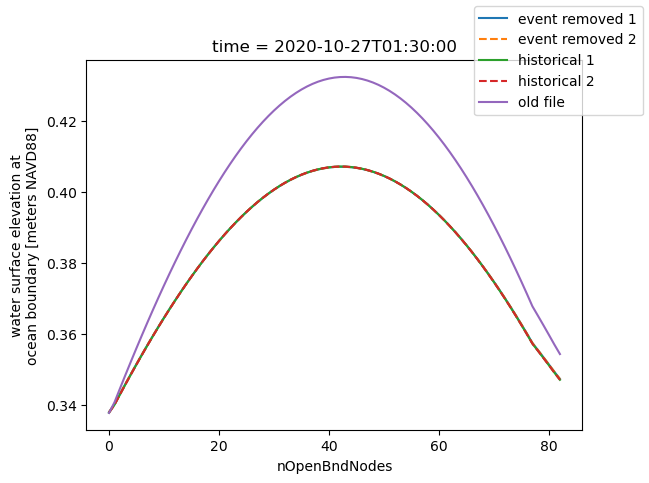

In [14]:
fig, ax =plt.subplots()
er1.sel(time='2020-10-27T01:30:00.000000000').time_series.plot(label='event removed 1')
er2.sel(time='2020-10-27T01:30:00.000000000').time_series.plot(label='event removed 2',linestyle='--')
hist1.sel(time='2020-10-27T01:30:00.000000000').time_series.plot(label='historical 1')
hist2.sel(time='2020-10-27T01:30:00.000000000').time_series.plot(label='historical 2',linestyle='--')
elev.sel(time='2020-10-27T01:30:00.000000000').time_series.plot(label='old file')
fig.legend()

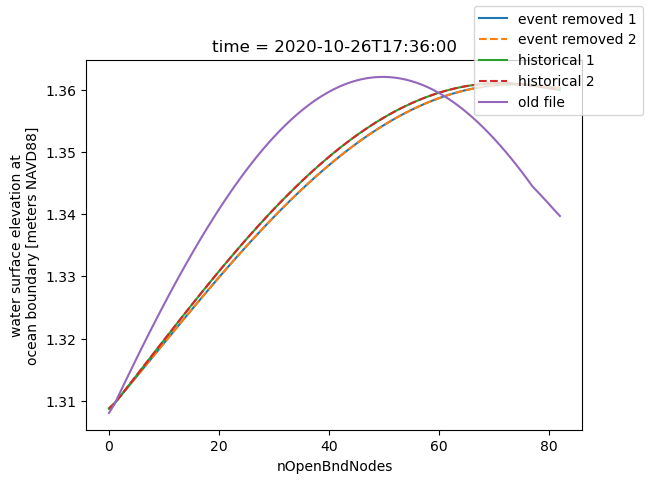

In [15]:
tplot=datetime(2020,10,26,17,36,0)
fig, ax =plt.subplots()
er1.sel(time=tplot).time_series.plot(label='event removed 1')
er2.sel(time=tplot).time_series.plot(label='event removed 2',linestyle='--')
hist1.sel(time=tplot).time_series.plot(label='historical 1')
hist2.sel(time=tplot).time_series.plot(label='historical 2',linestyle='--')
elev.sel(time=tplot).time_series.plot(label='old file')
fig.legend()

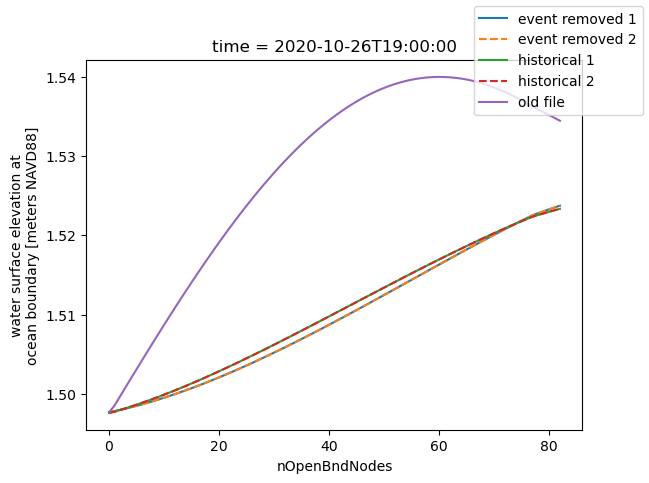

In [17]:
tplot=datetime(2020,10,26,19,00,0)
fig, ax =plt.subplots()
er1.sel(time=tplot).time_series.plot(label='event removed 1')
er2.sel(time=tplot).time_series.plot(label='event removed 2',linestyle='--')
hist1.sel(time=tplot).time_series.plot(label='historical 1')
hist2.sel(time=tplot).time_series.plot(label='historical 2',linestyle='--')
elev.sel(time=tplot).time_series.plot(label='old file')
fig.legend()

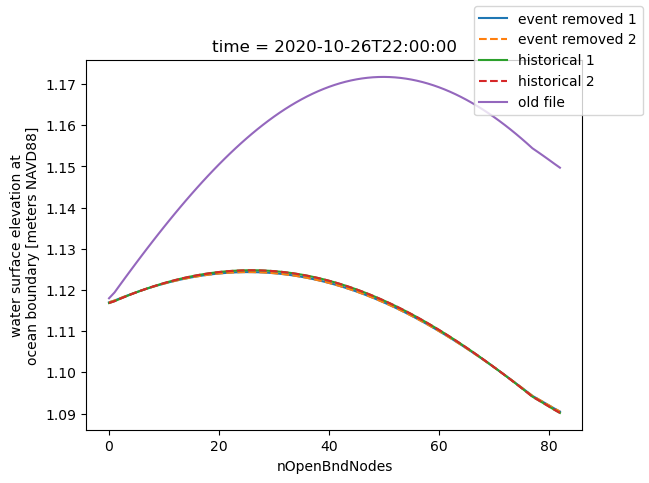

In [18]:
tplot=datetime(2020,10,26,22,00,0)
fig, ax =plt.subplots()
er1.sel(time=tplot).time_series.plot(label='event removed 1')
er2.sel(time=tplot).time_series.plot(label='event removed 2',linestyle='--')
hist1.sel(time=tplot).time_series.plot(label='historical 1')
hist2.sel(time=tplot).time_series.plot(label='historical 2',linestyle='--')
elev.sel(time=tplot).time_series.plot(label='old file')
fig.legend()

In [19]:
# Does this happen with any of the old files?
elev27=xr.open_dataset("/global/scratch/users/jennaisrael/run_schism/run_27/elev2D.th.nc")

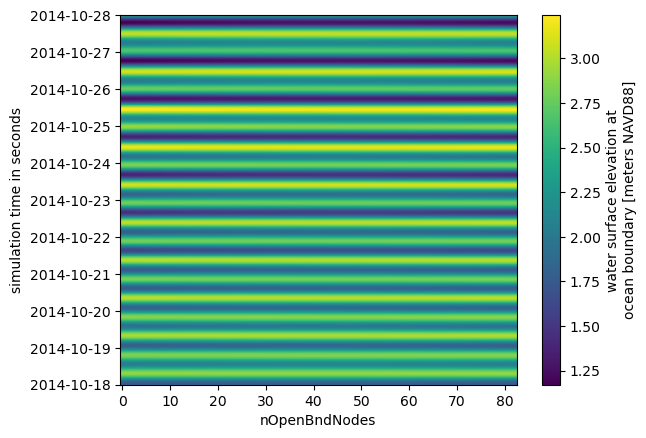

In [22]:
#elev27.time_series.plot()
elev27.loc[dict(time=slice('2014-10-18T00:00:00.000000000','2014-10-28T00:00:00.000000000'))].time_series.plot()

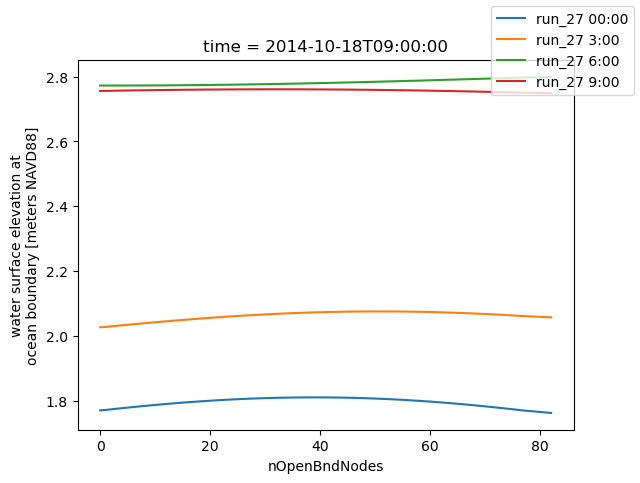

In [24]:
fig, ax = plt.subplots()
elev27.sel(time='2014-10-18T00:00:00.000000000').time_series.plot(label='run_27 00:00')
elev27.sel(time='2014-10-18T03:00:00.000000000').time_series.plot(label='run_27 3:00')
elev27.sel(time='2014-10-18T06:00:00.000000000').time_series.plot(label='run_27 6:00')
elev27.sel(time='2014-10-18T9:00:00.000000000').time_series.plot(label='run_27 9:00')
fig.legend()

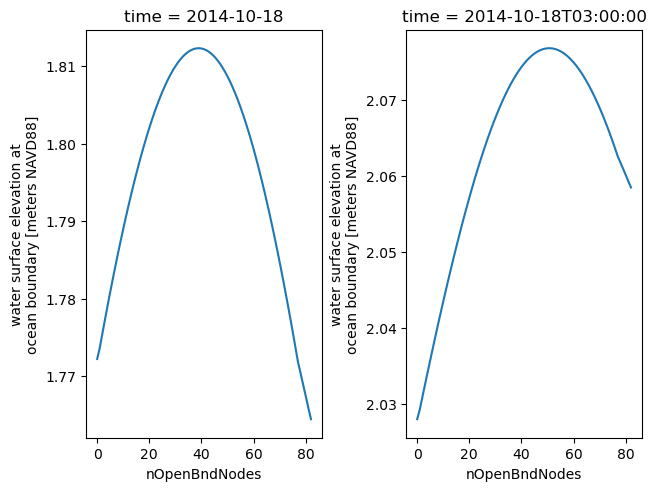

In [30]:
fig, ax = plt.subplots(1,2,layout='constrained')
elev27.sel(time='2014-10-18T00:00:00.000000000').time_series.plot(label='run_27 00:00',ax=ax[0])
elev27.sel(time='2014-10-18T03:00:00.000000000').time_series.plot(label='run_27 3:00',ax=ax[1])